<a href="https://colab.research.google.com/github/Adityainsight/Machine-Learning/blob/main/MLP_for_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Practical 8: Multi-Layer Perceptron (MLP) for MNIST
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MLP Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8553 - loss: 0.4768 - val_accuracy: 0.9626 - val_loss: 0.1259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9570 - loss: 0.1392 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9677 - loss: 0.1033 - val_accuracy: 0.9752 - val_loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0828 - val_accuracy: 0.9767 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.9777 - val_loss: 0.0723
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9782 - loss: 0.0669 - val_accuracy: 0.9777 - val_loss: 0.0743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9811 - loss: 0.0583 - val_accuracy: 0.9764 - val_loss: 0.0736
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9825 - loss: 0.0546 -

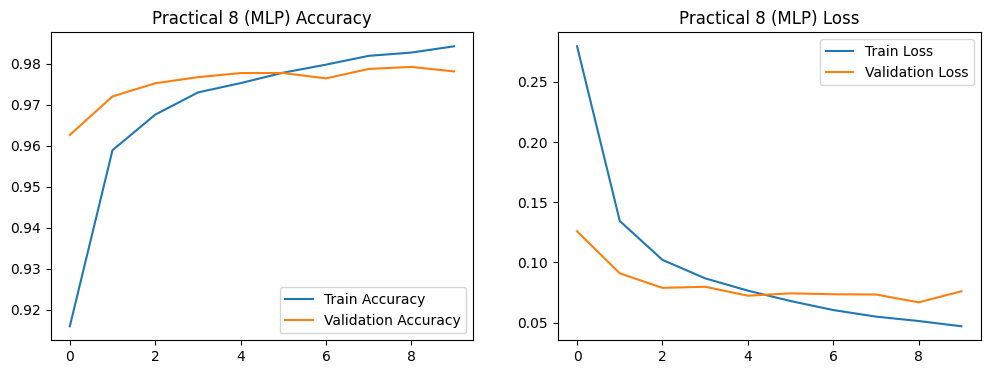

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_history(history, title="MLP Training History"):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.show()

def run_practical_8(epochs=10):
    """Implements and trains the Multi-Layer Perceptron (MLP) on MNIST."""
    print("\n" + "="*80)
    print("Practical 8: Multi-Layer Perceptron (MLP) for MNIST")
    print("="*80)

    # --- Data Loading & Preprocessing ---
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    NUM_CLASSES = 10
    y_train_ohe = to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = to_categorical(y_test, NUM_CLASSES)

    # --- Model Architecture (MLP) ---
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    # --- Compile and Train ---
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("MLP Model Summary:")
    model.summary()

    history = model.fit(
        x_train, y_train_ohe,
        epochs=epochs,
        batch_size=32,
        validation_data=(x_test, y_test_ohe),
        verbose=1
    )

    # --- Evaluation ---
    loss, accuracy = model.evaluate(x_test, y_test_ohe, verbose=0)
    print(f"\nMLP Test Accuracy: {accuracy:.4f}")

    y_pred_ohe = model.predict(x_test)
    y_pred = np.argmax(y_pred_ohe, axis=1)
    target_names = [str(i) for i in range(NUM_CLASSES)]

    print("\nMLP Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
    print("\nMLP Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    plot_history(history, "Practical 8 (MLP)")

# Run Practical 8
run_practical_8()
